In [1]:
import nltk

In [2]:
#nltk comes with a bunch of data sets that are necessary in order for it to operate in certain ways

In [3]:
#nltk.download_shell()
#if you want see the list of packages first enter l and then to downlowad enter d and name of the packgae

In [4]:
#The UCI is University of California Irvine and they actually have a machine learning repository with 
#a bunch of data sets that you can use.

In [11]:
#We are going to be using spam dataset to built a spam detection filter with Python.

In [12]:
#.strip method removes the character passed as an argument in .strip function. If nothing is passed, it will remove the
#whitespace based on the space given as an argument.

In [13]:
messages = [line.strip() for line in open('/Users/nikhilraizada/Downloads/Refactored_Py_DS_ML_Bootcamp-master/20-Natural-Language-Processing/smsspamcollection/SMSSpamCollection')]

In [14]:
print(len(messages))

5574


In [15]:
messages[0]

'ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [16]:
#A collection of text as you've mentioned is sometimes called a corpus.

In [18]:
#Let's go in and print out the first 10 messages and number them using enumerate

In [20]:
for mess_num,message in enumerate(messages[:10]):
    print(mess_num,messages)
    print('\n')

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [22]:
messages[0]

'ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [23]:
#this indicates that this is a tab separation instead of just parsing the TSV or tab separated files manually using Python.
#We can just take advantage of our panel's knowledge in order to do this.

In [24]:
import pandas as pd

In [25]:
#sep is separator
messages= pd.read_csv('/Users/nikhilraizada/Downloads/Refactored_Py_DS_ML_Bootcamp-master/20-Natural-Language-Processing/smsspamcollection/SMSSpamCollection',sep='\t',names=['label','messages'])

In [26]:
messages.head()

,label,messages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [27]:
#now do some exploratory data analysis of some data visualization and some statistical information about our 
#data to quickly check the stats.

In [28]:
messages.describe()

,label,messages
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [33]:
messages.groupby('label').describe()

messages                                                               
         count unique                                                top freq
label                                                                        
ham       4825   4516                             Sorry, I'll call later   30
spam       747    653  Please call our customer service representativ...    4

In [34]:
#With natural language processing. A large part of this is going to be feature engineering.The better your 
#domain knowledge on the data the better your ability to engineer more features from it and feature engineering 
#is a very large part of spam detection in general and I encourage you to read up on the topic by clicking the 
#link shown in the Jupiter notebook for this lecture.

In [35]:
#creating a new column of length of messages

In [41]:
#applying built in lenght function on messages dataframe where column is also messages
messages['length'] = messages['messages'].apply(len)

In [42]:
messages.head()

,label,messages,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [45]:
#let's visualise the length of the messages 

In [46]:
import matplotlib.pyplot as plt

In [47]:
import seaborn as sns

In [48]:
%matplotlib inline

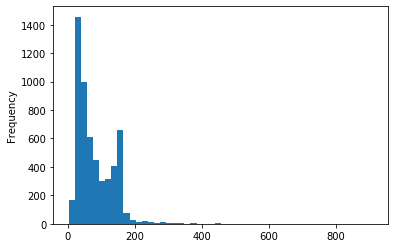

In [49]:
messages['length'].plot.hist(bins=50)

In [50]:
messages.describe()

,length
count,5572.000000
mean,80.489950
std,59.942907
min,2.000000
25%,36.000000
50%,62.000000
75%,122.000000
max,910.000000


In [51]:
messages[messages['length']==910]

,label,messages,length
1085,ham,For me the love should start with attraction.i...,910


In [53]:
#after the above code line we are grabbing messgae column 
messages[messages['length']==910]['messages'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f90ff307e10>,
      dtype=object)

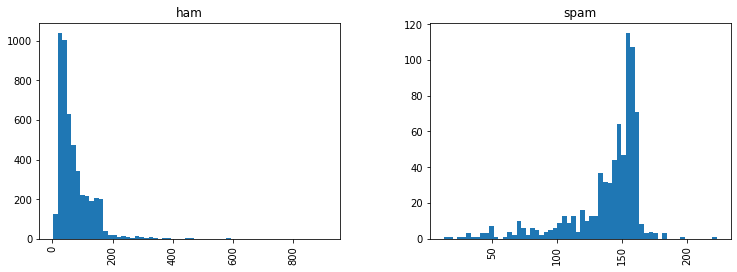

In [57]:
#by is actually creating subplots of categorical column
messages.hist(column='length',by='label',bins=60,figsize=(12,4))

In [58]:
#length is on x-axis
#And what's very interesting here is just through basic exploratory data analysis we've been able to
#discover a trend that spam messages tend to have more characters.

In [59]:
#To conclude as we've seen here just visually it looks like length is a good feature to distinguish a spam message

In [60]:
import string

In [61]:
mess = 'Sample message! Notice: It has punctuation.'

In [62]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [63]:
nopunc = [c for c in mess if c not in string.punctuation]

In [68]:
nopunc
#But notice now it's removed and left as a blank all the punctuation.

['S',
 'a',
 'm',
 'p',
 'l',
 'e',
 ' ',
 'm',
 'e',
 's',
 's',
 'a',
 'g',
 'e',
 ' ',
 'N',
 'o',
 't',
 'i',
 'c',
 'e',
 ' ',
 'I',
 't',
 ' ',
 'h',
 'a',
 's',
 ' ',
 'p',
 'u',
 'n',
 'c',
 't',
 'u',
 'a',
 't',
 'i',
 'o',
 'n']

In [70]:
nopunc = "".join(nopunc)
nopunc

'Sample message Notice It has punctuation'

In [66]:
from nltk.corpus import stopwords

In [82]:
stopwords.words('english')
#we have downloaded this words above. These are very common english words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [71]:
x= ['a','b','c','d']

In [74]:
"".join(x)

'abcd'

In [77]:
nopunc.split()

['Sample', 'message', 'Notice', 'It', 'has', 'punctuation']

In [80]:
clean_mess = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [81]:
clean_mess

['Sample', 'message', 'Notice', 'punctuation']

In [83]:
def text_process(mess):
    """
    1. remove punctuation
    2. remove stopwords
    3.return list of clean text words
    """
    nopunc = [char for char in mess if char not in string.punctuation]
    
    nopunc = ''.join(nopunc)
    
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    

In [84]:
messages.head()

,label,messages,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [86]:
messages['messages'].head(5).apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: messages, dtype: object

In [88]:
# There's lots of ways to continue to normalize this text data. We actually have only done very simple text 
#normalization in pre-processing and the nltk library has lots of built in tools and great documentation on a 
#lot of other methods of normalization for example :stemming
#What stemming does: If your text has a bunch of similar words such as running,ran and run. Stemming breaks down
#all of these and returns run

In [91]:
#And currently we have the messages as lists of tokens and now we need to convert each of those messages
#into a vector that scikit learns algorithm models can work with.We're going to do, is convert each
#message which is again represented by a list of tokens into a vector.

In [92]:
from sklearn.feature_extraction.text import CountVectorizer

In [94]:
#we are also ftting on our messages data
bow_transformer = CountVectorizer(analyzer=text_process).fit(messages['messages'])

In [96]:
#it will print the total number of vocab words
print(len(bow_transformer.vocabulary_))

11425


In [98]:
#take one sample text message and get it's bag of words count as a vector putting to use our new bow_transformer.
#Our bag of words transformer.

In [99]:
#grabbing the 4th message from our dataframe

In [100]:
mess4 = messages['messages'][3]

In [102]:
print(mess4)

U dun say so early hor... U c already then say...


In [103]:
#bow=bag of words
bow4 = bow_transformer.transform([mess4])

In [104]:
print(bow4)

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2


In [105]:
print(bow4.shape)

(1, 11425)


In [108]:
bow_transformer.get_feature_names()[4068]

'U'

In [109]:
bow_transformer.get_feature_names()[9554]

'say'

In [110]:
#transform entire dataframe messages into bow

In [111]:
messages_bow = bow_transformer.transform(messages['messages'])

In [113]:
print('Shape of Sparse Matrix: ',messages_bow.shape)

Shape of Sparse Matrix:  (5572, 11425)


In [114]:
#checking the amount of non-zeroes occurences

In [115]:
messages_bow.nnz

50548

In [117]:
#checking the sparsity
#below code is copied code from notebook

In [120]:
sparsity = (100.0 * messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1]))
print('sparsity: {}'.format(round(sparsity)))

sparsity: 0


In [121]:
sparsity = (100.0 * messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1]))
print('sparsity: {}'.format(sparsity))

sparsity: 0.07940295412668218


In [124]:
#You can see the true sparsity which is 0.079 and this is basically just comparing the number of non-zeros
#messages versus the actual total number of messages. And this kind of gives you an idea of just how many zeros 
#there are in your actual matrix.

In [125]:
#Now that we've done the counting. The term weights and normalization can be done with TF-IDF.

In [133]:
from sklearn.feature_extraction.text import TfidfTransformer

In [134]:
tfidf = TfidfTransformer().fit(messages_bow)

In [136]:
tfidf4 = tfidf.transform(bow4)

In [137]:
print(tfidf4)

  (0, 9554)	0.5385626262927564
  (0, 7186)	0.4389365653379857
  (0, 6222)	0.3187216892949149
  (0, 6204)	0.29953799723697416
  (0, 5261)	0.29729957405868723
  (0, 4629)	0.26619801906087187
  (0, 4068)	0.40832589933384067


In [138]:
#So we've been able to transform just a simple word count into an actual tfidf

In [139]:
#now we are going to check the inverse document frequency of the particular word

In [140]:
tfidf.idf_[bow_transformer.vocabulary_['university']]

8.527076498901426

In [141]:
#now converting the entire bag of words corpus into a tfidf corpus at once.

In [154]:
messages_tfidf = tfidf.transform(messages_bow)

In [155]:
#But now that we finally have the messages represented as numerical vectors as we've seen here we can
#finally train our spam ham classifier and we can actually use pretty much any sort of classification

In [156]:
#For a variety of reasons the naive base classifier algorithm is a good choice.

In [157]:
from sklearn.naive_bayes import MultinomialNB

In [158]:
#.fit first argument message_tfidf which we just created and message['label'] is the actual data
spam_detect_model = MultinomialNB().fit(message_tfidf,messages['label'])

In [159]:
#firstly trying to classifying the single random message

In [160]:
spam_detect_model.predict(tfidf4)

array(['ham'], dtype='<U4')

In [161]:
spam_detect_model.predict(tfidf4)[0]

'ham'

In [162]:
messages['label'][3]

'ham'

In [163]:
#to run prediction on all the messages in tfidf

In [165]:
all_pred = spam_detect_model.predict(messages_tfidf)

In [166]:
all_pred

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype='<U4')

In [167]:
from sklearn.model_selection import train_test_split

In [169]:
#our features are messages themselves

msg_train,msg_test,label_train,label_test = train_test_split(messages['messages'],messages['label'],test_size=0.3,random_state =101)

In [170]:
msg_train

4028        Yes, princess. Are you going to make me moan?
1310              Ok, be careful ! Don't text and drive !
5469                                              Ok lor.
5375    I cant pick the phone right now. Pls send a me...
3814                Pls i wont belive god.not only jesus.
                              ...                        
4171    Mmmmmm ... I love you,so much, Ahmad ... I can...
599     Will do. Was exhausted on train this morning. ...
1361    Yo dude guess who just got arrested the other day
1547                Shant disturb u anymore... Jia you...
4959                     Why didn't u call on your lunch?
Name: messages, Length: 3900, dtype: object

In [175]:
#For all the steps which we just did above, we can do it with the sckit learn pipeline features so you don't have
#to constantly repeat everything for different sets of data.

In [173]:
from sklearn.pipeline import Pipeline

In [174]:
#list takes the steps argument in the Pipeline
#in the list tuple takes in name of the step and the what you actually want to do

In [176]:
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    #And the next step was take those integer counts two weigh tfidf scores.
    ('tfidf',TfidfTransformer()),
   #finally actually want to train this on my model
    ('classifier',MultinomialNB())
    
])

In [178]:
#this is going to do the above three steps in the pipeline 
#instead of having to do it all manually yourself now you can just use pipeline in order to quickly and
#succinctly do all that.
pipeline.fit(msg_train,label_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x7f90e37a77a0>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [181]:
predictions = pipeline.predict(msg_test)
#Luckily for you you just have to pass in the actual text data.
#You no longer have to worry about manually doing the count vectorization or the tfidf transformation

In [182]:
from sklearn.metrics import classification_report

In [183]:
print(classification_report(label_test,predictions))

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1475
        spam       1.00      0.65      0.79       197

    accuracy                           0.96      1672
   macro avg       0.98      0.83      0.88      1672
weighted avg       0.96      0.96      0.96      1672



In [184]:
#The 96 percent accuracy or precision and recall which is pretty good considering that we're just dealing
#with straight text data.

In [185]:
#we could have used the other classifier as well ex: Random forest considering which will give us good results

In [186]:
#Finally: In the real world data, we are not going to do the steps which we did before the pipeline above. We will
#only be building pipelines, do the count vectorization do the transformation and then call whatever model you want
#and protects data. It should probably be multinomial and be depending on what you're working with and then just 
#call this pipeline as if it was the estimator that you created so pipelined that fit pipelined that predict etc.